In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
data = pd.read_csv('airline-passenger-traffic.csv', header=None)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 2 columns):
0    144 non-null object
1    140 non-null float64
dtypes: float64(1), object(1)
memory usage: 2.3+ KB


In [5]:
data.head()

,0,1
0,1949-01,112.0
1,1949-02,118.0
2,1949-03,132.0
3,1949-04,129.0
4,1949-05,121.0


In [6]:
data.columns=['Month', 'Passengers']
data['Month'] = pd.to_datetime(data.Month, format='%Y-%m')

In [7]:
data.head()

,Month,Passengers
0,1949-01-01,112.0
1,1949-02-01,118.0
2,1949-03-01,132.0
3,1949-04-01,129.0
4,1949-05-01,121.0


In [8]:
data.set_index('Month', inplace=True)
data.head()

,Passengers
Month,
1949-01-01,112.0
1949-02-01,118.0
1949-03-01,132.0
1949-04-01,129.0
1949-05-01,121.0


In [9]:
data

,Passengers
Month,
1949-01-01,112.0
1949-02-01,118.0
1949-03-01,132.0
1949-04-01,129.0
1949-05-01,121.0
1949-06-01,135.0
1949-07-01,148.0
1949-08-01,148.0
1949-09-01,136.0


# Time Series Analysis

## Plot

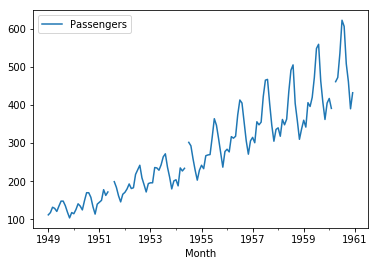

In [10]:
data.plot()

In [11]:
# missing value treatment methods
# 1 Mean imputation
data = data.assign(Passeengers_Mean_Imputation = data.Passengers.fillna(data.Passengers.mean()))
data.head()

,Passengers,Passeengers_Mean_Imputation
Month,,
1949-01-01,112.0,112.0
1949-02-01,118.0,118.0
1949-03-01,132.0,132.0
1949-04-01,129.0,129.0
1949-05-01,121.0,121.0


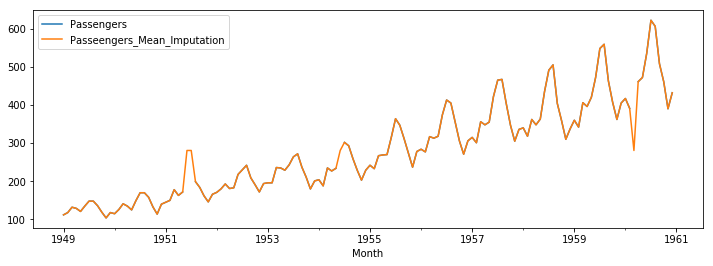

In [12]:
data.plot(figsize=(12, 4))


In [13]:
data[data.Passengers.isna()]

,Passengers,Passeengers_Mean_Imputation
Month,,
1951-06-01,NaN,280.735714
1951-07-01,NaN,280.735714
1954-06-01,NaN,280.735714
1960-03-01,NaN,280.735714


In [14]:
# Linear interpolation
data = data.assign(Passeengers_Linear_Imputation = data.Passengers.interpolate(method='linear'))
data[data.Passengers.isna()]

,Passengers,Passeengers_Mean_Imputation,Passeengers_Linear_Imputation
Month,,,
1951-06-01,NaN,280.735714,181.0
1951-07-01,NaN,280.735714,190.0
1954-06-01,NaN,280.735714,268.0
1960-03-01,NaN,280.735714,426.0


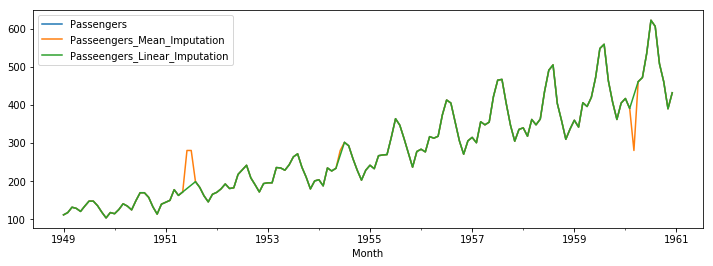

In [15]:
 data.plot(figsize=(12, 4))

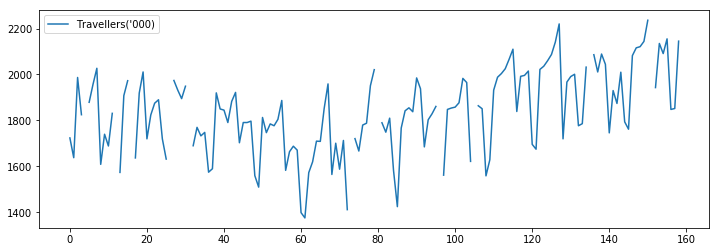

In [16]:
df = pd.read_csv('Metrail.csv')
df.plot(figsize=(12, 4))

In [17]:
df.head()

,Month,Travellers('000)
0,Jan/91,1724.0
1,Feb/91,1638.0
2,Mar/91,1987.0
3,Apr/91,1825.0
4,May/91,NaN


In [18]:
df['Travellers (last observed value)'] = df["Travellers('000)"].fillna(method='pad')

In [19]:
df.describe()

,Travellers('000),Travellers (last observed value)
count,148.000000,159.000000
mean,1837.547297,1838.685535
std,177.907923,181.136991
min,1376.000000,1376.000000
25%,1718.250000,1716.500000
50%,1843.500000,1845.000000
75%,1976.250000,1978.500000
max,2236.000000,2236.000000


In [20]:
df['Travellers (linear)'] = df["Travellers('000)"].interpolate(method='linear')
df.describe()

,Travellers('000),Travellers (last observed value),Travellers (linear)
count,148.000000,159.000000,159.000000
mean,1837.547297,1838.685535,1836.566038
std,177.907923,181.136991,175.906973
min,1376.000000,1376.000000,1376.000000
25%,1718.250000,1716.500000,1716.500000
50%,1843.500000,1845.000000,1839.000000
75%,1976.250000,1978.500000,1973.500000
max,2236.000000,2236.000000,2236.000000


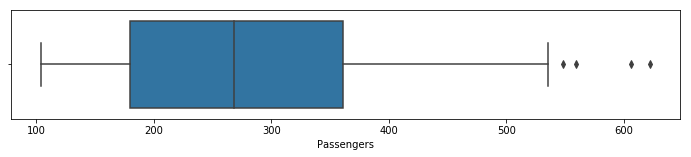

In [30]:
# Box plot and outlier treatment
fig = plt.subplots(figsize=(12, 2))
ax = sns.boxplot(x = data['Passengers'], whis=1)

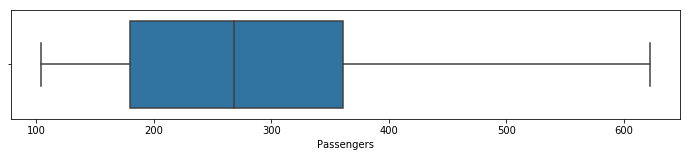

In [29]:
fig = plt.subplots(figsize=(12, 2))
ax = sns.boxplot(x = data['Passengers'])

## Time Series Decomposition

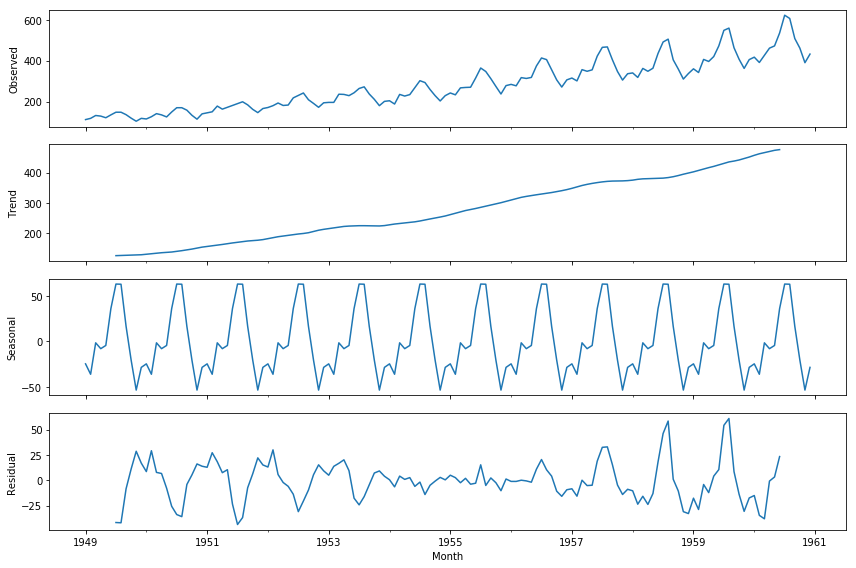

In [32]:
## Additive

from pylab import rcParams
import statsmodels.api as sm

rcParams['figure.figsize'] = 12,8
decomposition = sm.tsa.seasonal_decompose(data.Passeengers_Linear_Imputation, model='additive')
fig=decomposition.plot()
plt.show()

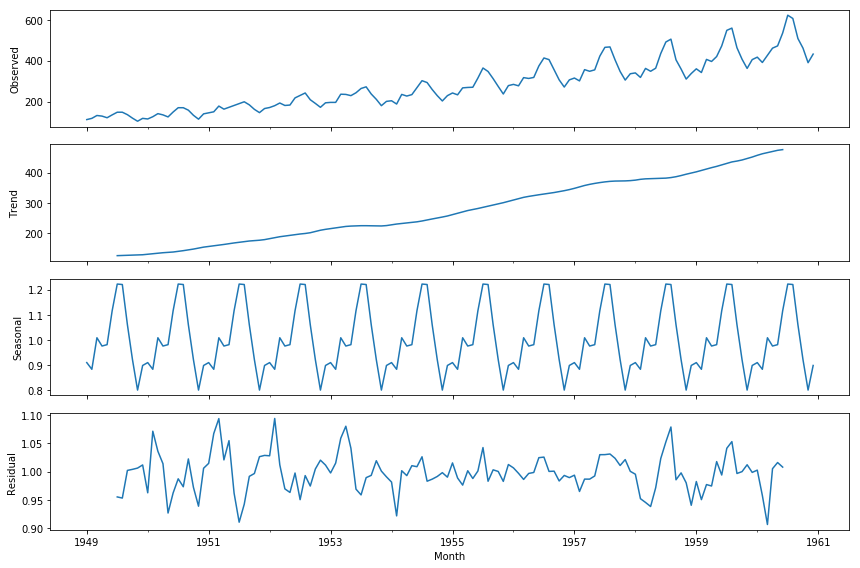

In [33]:
# Multiplicative seasonal decomposition

decomposition = sm.tsa.seasonal_decompose(data.Passeengers_Linear_Imputation, model = 'multiplicative')
fig=decomposition.plot()
plt.show()